In [1]:
!mamba install pandas

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 2.7797000000476837 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ pandas                        3.0.0                         np22py313h9d9dc1e_0           emscripten-forge              
+ python-tzdata                 2025.3                        pyhd8ed1ab_0                  conda-forge                   
- pip                           25.3                          pyh145f28c_0                  conda-forge                   


In [2]:
!mamba install scikit-learn

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, scikit-learn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 0.8711000001430511 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ brotli-python                 1.2.0                         py313h33caa6c_0               emscripten-forge              
+ certifi                       2026.1.4                      pyhd8ed1ab_0                  conda-forge                   
+ charset-normalizer            3.4.4                         pyhd8ed1ab_0                  conda-forge                   
+ idna                          3.11                          pyhd8ed1ab_0                  conda-forge                   
+ joblib                        1.5.3

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

<h1> Stabla Odlucivanja</h1>

Koristimo skup podataka Breast Cancer Wisconsin (Diagnostic) Data Set).<br> 
Skup podataka se sastoji od 33 atributa. <br>
Vrednosti atributa su izračunati sa digitalizovanih slika mase, koje opisuju karakteristike ćelija prikazanih na slici. <br>
Vrednost atributa diagnosis sadrži informaciju o tome da li je u pitanju benigni ili maligni tumor.

<h3> Učitavanje i analiza skupa podataka

In [4]:
data = pd.read_csv('data.csv')
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='str')

In [5]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


<h3>Rad sa nedostajućim vrednostima

U skupu postoje nedostajuće vrednosti.<br> 
Detaljnijom proverom po kolonama, vidimo da se one javljaju samo u koloni Unnamed: 32,<br> 
kao i da su zapravo sve vrednosti u ovoj koloni NaN.<br> 
Iz tog razloga smatramo da je ovo greška i kolonu izbacujemo iz skupa.

In [6]:
data.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [7]:
data['Unnamed: 32'].isna().all() # da li su sve vrednosti NaN

np.True_

🧠 **Šta predstavlja axis?**

 axis govori u kom pravcu se operacija primenjuje nad tabelom (DataFrame-om).

U Pandas-u imaš dva pravca:

  -  axis=0	vrste	
  -  axis=1	kolone	

In [8]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [9]:
data[:].count().count() #koliko sada imamo kolona

np.int64(32)

In [10]:
data.drop('id', axis=1, inplace=True)

<h3>Podela na ulazne i ciljne atribute

In [11]:
data['diagnosis'].unique()

<StringArray>
['M', 'B']
Length: 2, dtype: str

Informacija o vrsti tumora se nalazi u koloni diagnosis (ciljni atribut), dok se ostali atributi koriste za predikciju (ulazni atributi).

In [12]:
# CILJNI ATRIBUT
Y = data['diagnosis'] # samo kolona diagnosis 

# ULAZNI ATRIBUTI
X = data.drop('diagnosis', axis=1) # sve sem kolone diagnosis

feature_names = X.columns

feature_names

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='str')

Vrednosti u Y (klasa) je:
- M - maligni i
- B - benigni tumor

Dakle, rešavamo problem ***binarne klasifikacije***.

<h3>Provera balansiranosti klasa

In [13]:
M , B = 0, 0
for i in range(Y.size):
    if Y[i] == 'M':
        M+=1
    else:
        B+=1

print('M:', M, round(M/Y.size*100), '%')
print('B:', B, round(B/Y.size*100), '%')

M: 212 37 %
B: 357 63 %


Primećujemo blagu nebalansiranost (37%-63%).

Tipično, binarna klasifikacija sadrži jednu klasu koja predstavlja normalno stanje i drugu koja predstavlja abnormalno stanje.<br>
U našem primeru, benigni tumor predstavlja normalno stanje, a maligni abnormalno.<br> 
Klasi koja predstavlja normalno stanje se dodeljuje oznaka 0, dok se drugoj klasi dodeljuje oznaka 1.

In [20]:
# Y.replace('M', 0, inplace=True)
# Y.replace('B', 1, inplace=True)

Y = Y.replace({'M': 0, 'B': 1}).astype(int)

<h3>Analiza ulaznih atributa

`Kod stabla odlucivanja` **`nije potrebno uraditi normalizaciju podataka`**<br>
`Stabla odlucivanja` **`nisu puno osetljiva na outlajere`**

1. **klasifikaciono stablo**

- list vraća klasu

- koristi <i>Gini ili entropiju

2. **regresiono stablo**

- list vraća broj (prosek)

- koristi <i>MSE (grešku)

  _____________________________________________________________

Završili smo početnu analizu skupa podataka. Sada je potrebno da izvršimo stratifikovanu podelu na **test** i **trening** skup, u razmeri 1:3.

<h4>🧠 Šta radi train_test_split()?</h4>

-> `train_test_split()` deli podatke na dva dela:

- <b>train</b> (trening skup) → na njemu model uči

- <b>test</b> (test skup) → na njemu proveravaš koliko je naučio

`X_train`	podaci za učenje<br>
`X_test`	podaci za test<br>
`Y_train`	tačni odgovori za train<br>
`Y_test`	tačni odgovori za test
_____________________________________________________________________
Bez `random_state`:<br>
- svaki put drugačija podela
- drugačiji train i test skup
- drugačiji rezultat ❌

Sa `random_state`:<br>
- uvek ISTA podela
- isti train/test skup
- uporedivi rezultati ✔️

__________________________________________________________________
Bez `stratify=y`:<br>

Može da se desi:<br>
- test skup ima premalo M
- ili čak nijedan M ❌<br>
  
Sa `stratify=y`:<br>
- isti odnos klasa
- fer test
- stabilniji rezultati ✔️

  
➡ rezultat NEPOUZDAN

Ako u celom skupu imaš:<br>
-  63% B<br>
- 37% M<br>
  
onda će i:<br>
- train imati ≈ 63% B i 37% M<br>
- test imati ≈ 63% B i 37% M<br>

👉 ništa se ne „pokvari“ raspodelom.

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=41)

<h3>Treniranje (učenje) modela</h3>

Drugim rečima:<br>

> <i>Pravimo stablo odlučivanja na trening podacima

Model:

- gleda X_train

- uči kako da predvidi y_train

- gradi stablo (postavlja pitanja)


In [16]:
model = DecisionTreeClassifier(criterion='gini', random_state=41)

model.fit(X_train, Y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",41
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

<h3>Predikcija na test skupu</h3>

Kad je model naučio, pitaš ga:

„Kako bi odlučio za podatke koje NIKAD nije video?“

To ti kaže:

> u kom procentu slučajeva je model bio u pravu

In [17]:
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [18]:
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.9370629370629371

<h3>Plotovanje stabla odlučivanja

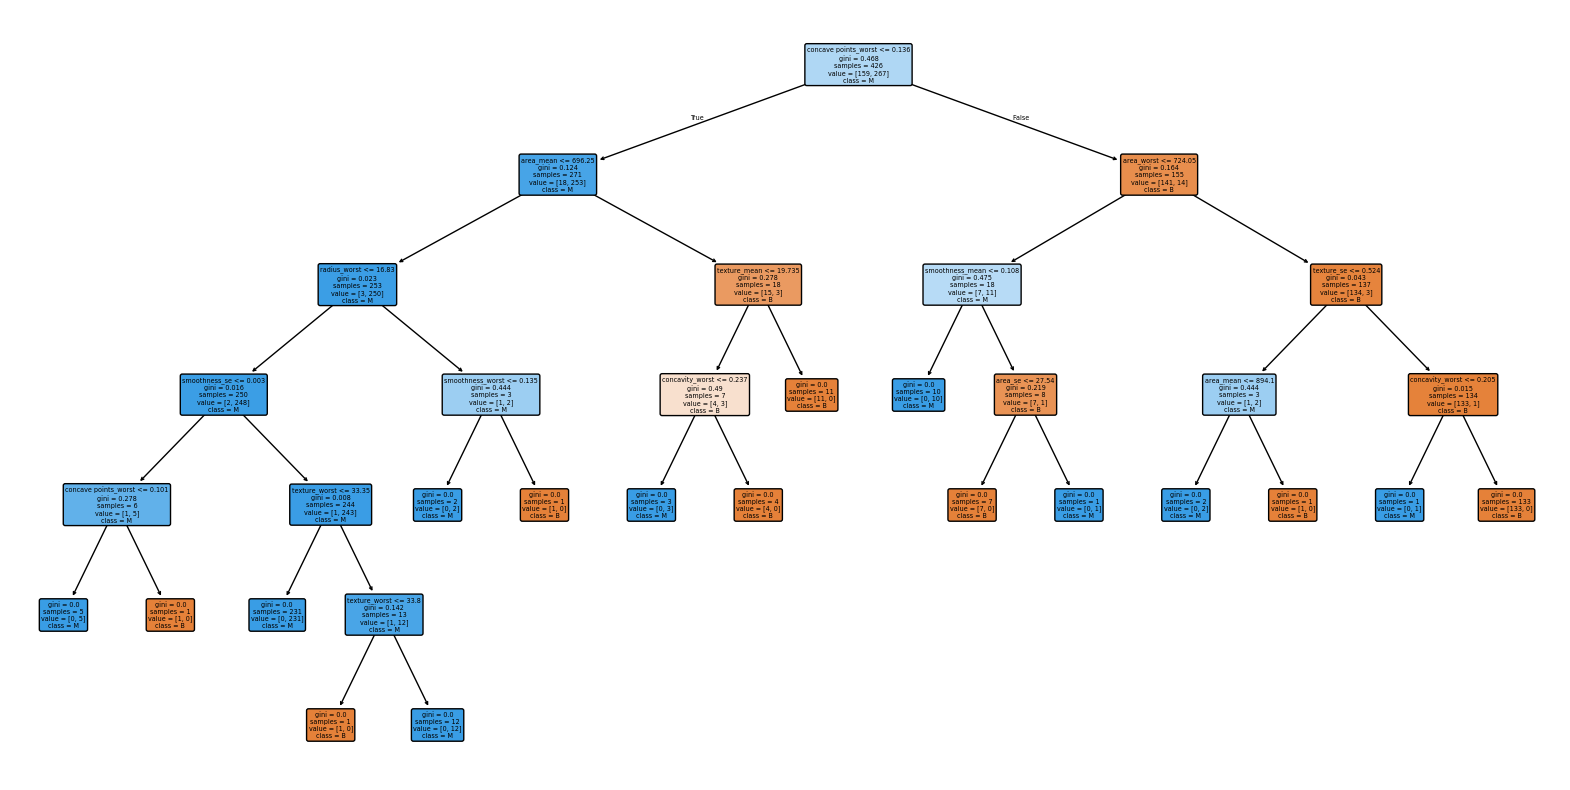

In [19]:
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X_train.columns,
    class_names=["B", "M"],    # class_names=[str(c) for c in model.classes_]
    filled=True,
    rounded=True
)
plt.show()